# MNIST Comparision

Here we are going to compare predicting MNIST with a few different set of models:

* Simple Custom Liner Model
* with nn.Linear
* Simple 3 Layer Custom Nueral Network Model
* Simple 3 Layer Nueral Network Model (based on nn.XXX)
* With CNN

In [1]:
from fastai2.vision.all import *
from utils import *
matplotlib.rc('image', cmap='Blues')

## Loading Images

In [2]:
im_path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
im_path.ls()

(#3) [Path('/storage/data/mnist_sample/valid'),Path('/storage/data/mnist_sample/labels.csv'),Path('/storage/data/mnist_sample/train')]

In [4]:
(im_path/"train").ls()

(#2) [Path('/storage/data/mnist_sample/train/7'),Path('/storage/data/mnist_sample/train/3')]

In [5]:
(im_path/"train/7").ls()

(#6265) [Path('/storage/data/mnist_sample/train/7/25110.png'),Path('/storage/data/mnist_sample/train/7/53601.png'),Path('/storage/data/mnist_sample/train/7/30310.png'),Path('/storage/data/mnist_sample/train/7/46636.png'),Path('/storage/data/mnist_sample/train/7/45844.png'),Path('/storage/data/mnist_sample/train/7/31812.png'),Path('/storage/data/mnist_sample/train/7/37612.png'),Path('/storage/data/mnist_sample/train/7/57177.png'),Path('/storage/data/mnist_sample/train/7/41892.png'),Path('/storage/data/mnist_sample/train/7/38210.png')...]

In [6]:
def load_images(im_dir_path):
    return torch.stack([tensor(Image.open(im)).float()/255 for im in im_dir_path.ls()])

In [7]:
train_3s = load_images((im_path/"train/3"));
train_7s = load_images((im_path/"train/7"));
valid_3s = load_images((im_path/"valid/3"));
valid_7s = load_images((im_path/"valid/7"));

In [8]:
train_3s.shape, train_7s.shape, valid_3s.shape, valid_7s.shape

(torch.Size([6131, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([1010, 28, 28]),
 torch.Size([1028, 28, 28]))

## Creating Dataloaders

Now we need to define these images into a format where fastai understands.

In [9]:
def get_dataloader(a, b, batch_size=225):
    x = torch.cat([a, b]).view(-1, 28*28)
    y = tensor([1] * len(a) + [0]* len(b)).unsqueeze(1)
    dset = list(zip(x, y))
    return DataLoader(dset, batch_size)

In [10]:
train_dl = get_dataloader(train_3s, train_7s)
valid_dl = get_dataloader(valid_3s, valid_7s)

In [11]:
dls = DataLoaders(train_dl, valid_dl)

## Loss & Accuracy

In [12]:
def mnist_loss(preds, Y):
    return (torch.sigmoid(preds) - Y).abs().float().mean()

In [13]:
def mnist_accuracy(preds, Y):
    return ((torch.sigmoid(preds) > 0.5).float() == Y).float().mean()

## Model 1. Simple Linear Model

In [177]:
class SimpleLinerModel(nn.Module):
    def __init__(self, in_features, out_features=1):
        super(SimpleLinerModel, self).__init__()
        self.W = torch.randn((in_features, out_features)).requires_grad_()
        self.B = torch.randn(1).requires_grad_()
        
    def parameters(self):
        return [self.W, self.B]
    
    def forward(self, X):
        return X@self.W + self.B

In [178]:
learn = Learner(dls, SimpleLinerModel(28*28), opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [179]:
learn.fit(20, lr=1.)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.673104,0.506043,0.494112,00:00
1,0.656647,0.505270,0.494603,00:00
2,0.652472,0.505023,0.494603,00:00
3,0.651094,0.504887,0.495093,00:00
4,0.650593,0.504804,0.495093,00:00
5,0.650397,0.504752,0.495584,00:00
6,0.650312,0.504717,0.495584,00:00
7,0.650270,0.504693,0.495584,00:00
8,0.650247,0.504675,0.495584,00:00
9,0.650232,0.504661,0.495584,00:00


In [180]:
learn.fit(10, lr=1.)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.650167,0.504600,0.495584,00:00
1,0.650165,0.504597,0.495584,00:00
2,0.650161,0.504595,0.495584,00:00
3,0.650157,0.504593,0.495584,00:00
4,0.650153,0.504592,0.495584,00:00
5,0.650149,0.504590,0.495584,00:00
6,0.650144,0.504589,0.495584,00:00
7,0.650140,0.504587,0.495584,00:00
8,0.650135,0.504586,0.495584,00:00
9,0.650129,0.504586,0.495584,00:00


## Model 2: With nn.Linear

In [14]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [15]:
learn.fit(20, lr=1.)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.617789,0.126132,0.924926,00:00
1,0.164728,0.258426,0.753680,00:00
2,0.064083,0.130997,0.886654,00:00
3,0.033467,0.088467,0.922964,00:00
4,0.023227,0.067609,0.942591,00:00
5,0.019401,0.055567,0.955348,00:00
6,0.017719,0.048047,0.962709,00:00
7,0.016807,0.043055,0.965162,00:00
8,0.016197,0.039507,0.966143,00:00
9,0.015737,0.036828,0.968597,00:00


## Model 3: Nueral Network Based on nn.

In [183]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)
learn = Learner(dls, model, opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [184]:
learn.fit(20, lr=.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.267161,0.424275,0.504416,00:00
1,0.116949,0.214164,0.819921,00:00
2,0.063399,0.108863,0.917566,00:00
3,0.042782,0.074768,0.941119,00:00
4,0.033876,0.058683,0.957311,00:00
5,0.029433,0.049474,0.965162,00:00
6,0.026832,0.043636,0.967125,00:00
7,0.025069,0.039647,0.968106,00:00
8,0.023731,0.036763,0.971050,00:00
9,0.022640,0.034570,0.972522,00:00


In [185]:
learn.fit(10, lr=.2)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.013599,0.027762,0.976938,00:00
1,0.013889,0.026670,0.976938,00:00
2,0.013763,0.025701,0.976938,00:00
3,0.013556,0.024867,0.977429,00:00
4,0.013338,0.024140,0.977920,00:00
5,0.013131,0.023499,0.978410,00:00
6,0.012937,0.022930,0.977920,00:01
7,0.012758,0.022422,0.978410,00:01
8,0.012592,0.021965,0.980373,00:01
9,0.012436,0.021552,0.980373,00:00


## Nueral Network with More Layers

In [186]:
model = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

In [187]:
learn = Learner(dls, model, opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [188]:
learn.fit(10, lr=.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.391619,0.434789,0.504416,00:00
1,0.154060,0.273392,0.747301,00:00
2,0.069758,0.122748,0.900393,00:00
3,0.039797,0.081026,0.932287,00:00
4,0.028332,0.061937,0.947498,00:00
5,0.023437,0.050813,0.959764,00:00
6,0.020993,0.043779,0.964671,00:00
7,0.019536,0.039153,0.966634,00:00
8,0.018508,0.035928,0.967125,00:00
9,0.017680,0.033524,0.969087,00:00


In [189]:
learn.fit(10, lr=.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.016610,0.031617,0.970069,00:00
1,0.016140,0.030022,0.971541,00:00
2,0.015636,0.028651,0.973503,00:00
3,0.015139,0.027440,0.974975,00:00
4,0.014671,0.026360,0.976448,00:00
5,0.014243,0.025394,0.977429,00:00
6,0.013863,0.024537,0.978410,00:00
7,0.013527,0.023776,0.978901,00:00
8,0.013230,0.023103,0.978901,00:00
9,0.012969,0.022506,0.979882,00:00


# Let's load some different images

This will be something harder.

In [16]:
im_path2 = untar_data(URLs.MNIST)

In [17]:
im_path2.ls()

(#2) [Path('/storage/data/mnist_png/training'),Path('/storage/data/mnist_png/testing')]

In [18]:
(im_path2/"training/6").ls()

(#5918) [Path('/storage/data/mnist_png/training/6/53336.png'),Path('/storage/data/mnist_png/training/6/12902.png'),Path('/storage/data/mnist_png/training/6/25742.png'),Path('/storage/data/mnist_png/training/6/1182.png'),Path('/storage/data/mnist_png/training/6/2777.png'),Path('/storage/data/mnist_png/training/6/9042.png'),Path('/storage/data/mnist_png/training/6/43564.png'),Path('/storage/data/mnist_png/training/6/21684.png'),Path('/storage/data/mnist_png/training/6/2925.png'),Path('/storage/data/mnist_png/training/6/10600.png')...]

In [19]:
train_6s = load_images(im_path2/"training/3")
train_9s = load_images(im_path2/"training/5")
valid_6s = load_images(im_path2/"testing/3")
valid_9s = load_images(im_path2/"testing/5")

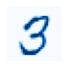

In [20]:
show_image(train_6s[0])

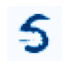

In [21]:
show_image(train_9s[0])

In [22]:
train_dl2 = get_dataloader(train_6s, train_9s)
valid_dl2 = get_dataloader(valid_6s, valid_9s)

In [23]:
dls2 = DataLoaders(train_dl2, valid_dl2)

## Try Linear Model

In [198]:
learn = Learner(dls2, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [199]:
learn.fit(40, lr=1.)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.609079,0.467920,0.531020,00:00
1,0.576157,0.443532,0.525237,00:00
2,0.232158,0.521724,0.468980,00:00
3,0.132388,0.482219,0.495268,00:00
4,0.080359,0.423533,0.556782,00:00
5,0.056687,0.374824,0.610936,00:00
6,0.046135,0.338079,0.657203,00:00
7,0.041148,0.309776,0.689800,00:00
8,0.038620,0.287245,0.714511,00:00
9,0.037191,0.268450,0.736067,00:00


In [200]:
learn.fit(100, lr=0.2)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.059381,0.058425,0.949001,00:00
1,0.052829,0.054427,0.955836,00:00
2,0.050745,0.053724,0.956887,00:00
3,0.049934,0.053480,0.957413,00:00
4,0.049551,0.053318,0.957939,00:00
5,0.049321,0.053176,0.957939,00:00
6,0.049148,0.053044,0.957939,00:00
7,0.048998,0.052917,0.957939,00:00
8,0.048859,0.052794,0.957939,00:00
9,0.048727,0.052676,0.957939,00:00


In [201]:
learn.fit(100, lr=0.2)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.043062,0.046314,0.962671,00:00
1,0.043037,0.046274,0.962671,00:00
2,0.043007,0.046234,0.962671,00:00
3,0.042975,0.046195,0.962671,00:00
4,0.042943,0.046156,0.962671,00:00
5,0.042909,0.046117,0.962671,00:00
6,0.042876,0.046079,0.962145,00:00
7,0.042843,0.046041,0.962145,00:00
8,0.042809,0.046004,0.962145,00:00
9,0.042777,0.045967,0.962145,00:00


In [202]:
learn.fit(100, lr=0.2)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.040466,0.043729,0.963722,00:00
1,0.040451,0.043713,0.963722,00:00
2,0.040434,0.043698,0.963722,00:00
3,0.040416,0.043683,0.963722,00:00
4,0.040398,0.043667,0.963722,00:00
5,0.040378,0.043652,0.963722,00:00
6,0.040359,0.043638,0.963722,00:00
7,0.040340,0.043623,0.963722,00:00
8,0.040321,0.043608,0.963722,00:00
9,0.040302,0.043594,0.963722,00:00


In [203]:
learn.fit(100, lr=0.2)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.038843,0.042620,0.963197,00:00
1,0.038833,0.042612,0.963197,00:00
2,0.038821,0.042604,0.963197,00:00
3,0.038809,0.042596,0.963197,00:00
4,0.038796,0.042588,0.963197,00:00
5,0.038783,0.042580,0.963197,00:00
6,0.038769,0.042572,0.963197,00:00
7,0.038756,0.042564,0.963197,00:00
8,0.038743,0.042556,0.963197,00:00
9,0.038730,0.042548,0.963197,00:00


## Try a Simple Neural Network

In [204]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)
learn = Learner(dls2, model, opt_func=SGD, loss_func=mnist_loss, metrics=mnist_accuracy)

In [205]:
learn.fit(20, lr=0.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.456487,0.503295,0.468980,00:01
1,0.275844,0.508611,0.468980,00:01
2,0.182600,0.475048,0.481073,00:01
3,0.124603,0.419702,0.541009,00:01
4,0.091659,0.363855,0.615142,00:00
5,0.073710,0.317886,0.675079,00:00
6,0.063589,0.282484,0.726604,00:00
7,0.057434,0.255425,0.760252,00:00
8,0.053365,0.234189,0.781809,00:00
9,0.050489,0.217035,0.793375,00:00


In [206]:
learn.fit(100, lr=0.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.039974,0.134173,0.873291,00:00
1,0.039676,0.130602,0.876446,00:00
2,0.039348,0.127332,0.878549,00:00
3,0.039012,0.124321,0.880652,00:00
4,0.038685,0.121538,0.885384,00:00
5,0.038372,0.118969,0.890116,00:00
6,0.038077,0.116584,0.891693,00:00
7,0.037801,0.114366,0.892219,00:00
8,0.037541,0.112305,0.894848,00:00
9,0.037298,0.110370,0.897476,00:00


In [207]:
learn.fit(100, lr=0.1)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.029236,0.063055,0.937960,00:00
1,0.029189,0.062814,0.938486,00:00
2,0.029133,0.062583,0.938486,00:00
3,0.029073,0.062341,0.939012,00:00
4,0.029010,0.062117,0.939012,00:00
5,0.028945,0.061883,0.939012,00:01
6,0.028881,0.061659,0.939537,00:00
7,0.028815,0.061444,0.940063,00:00
8,0.028749,0.061219,0.941640,00:00
9,0.028682,0.061004,0.942692,00:00


In [210]:
learn.fit(100, lr=0.01)

epoch,train_loss,valid_loss,mnist_accuracy,time
0,0.025548,0.032408,0.967928,00:00
1,0.025538,0.032406,0.967928,00:00
2,0.025527,0.032404,0.967928,00:00
3,0.025515,0.032402,0.967928,00:00
4,0.025502,0.032400,0.967928,00:00
5,0.025489,0.032398,0.967928,00:00
6,0.025476,0.032396,0.967928,00:00
7,0.025462,0.032394,0.967928,00:00
8,0.025449,0.032392,0.967928,00:00
9,0.025436,0.032390,0.967928,00:00


In [ ]:
learn.fit(100, lr=0.01)

## Let's use the CNN Learner

In [29]:
dlsCnn = ImageDataLoaders.from_folder(im_path)

In [31]:
learn = cnn_learner(dlsCnn, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)

In [32]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.127215,0.024708,0.992149,00:15


**As we can see, it got 99% accuracy in the first run**

So, there's more we need to learn.